#### Pip Installments

In [1]:
pip install python-igraph


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -i https://test.pypi.org/simple/ hetpy==0.1.1b0

Looking in indexes: https://test.pypi.org/simple/

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pycairo


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install cairocffi


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Basic Graph Creation

In [23]:
from hetpy import HetGraph, Node, Edge, HetPaths, MetaPath
import matplotlib.pyplot as plt
import igraph as ig
import pandas as pd

import itertools

#### Create a simple graph with 2 types and one edge type

HetPy functions as a standard graph library which uses strongly typed node and edge objects. To create a basic, simple graph, we first create a standard set of two nodes and a single edge that connects those nodes.

In [7]:
node = Node("MockType",{"Name": "node1"})
node_two = Node("MockType2",{"Name": "node2"})

edge = Edge(node, node_two, True, "EdgeType")

We can then easily create a heterogeneous graph $G=(V,E)$ defined by set of nodes $V$ and a set of edges $E$ 

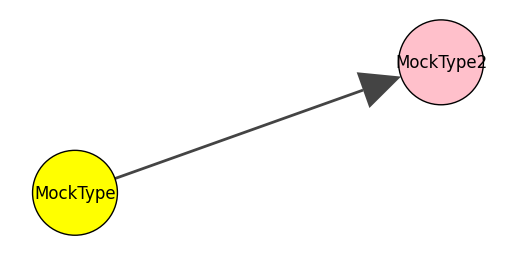

In [39]:
graph = HetGraph([node, node_two], [edge])
color_map = {
    "MockType": "yellow",
    "MockType2": "pink"
}
visual_style = {
    "vertex_label": [node.type for node in [node, node_two]]
}
fig, ax = plt.subplots()
graph.plot(type_color_map=color_map, axis=ax, plot_args=visual_style)

While this graph is quite simple, we can also define edge types by the node tyes they connect and add a list of these paths to the graph. These semantic paths then enable us to infer edge types while creating the graph. Furthermore, we can add attribtues to the nodes that are handeled just like normal attributes.

In [9]:
# define paths

edge_type_mappings = [(("Player","Club"),"played_for"), (("Club", "Shirt"),"wears")]
paths = HetPaths(edge_type_mappings)

In [10]:
# define nodes and edges
players = [Node("Player", {"Name": "Lionel Messi"}), Node("Player", {"Name": "Toni Kroos"}), Node("Player", {"Name": "Luis Figo"})]
clubs = [Node("Club", {"Name": "Real Madrid"}), Node("Club", {"Name": "FC Barcelona"})]
shirts = [Node("Shirt", {"shirt_color": "White"}), Node("Shirt", {"shirt_color": "Blue and Red"})]

nodes = list(itertools.chain(players, clubs, shirts))
edges = [
    Edge(players[0], clubs[1], False),
    Edge(players[1], clubs[0], False),
    Edge(players[2], clubs[1], False),
    Edge(players[2], clubs[0], False),
    Edge(clubs[0], shirts[0], False),
    Edge(clubs[1], shirts[1], False)
]



Then we can create a hetGraph out of the defined objects. You will notice that during creation, the graph constructor will report that some edges have a undefined type and that the type will be infered from the paths assigned to it. After creation, we can check if all edge types are correctly inferred.

In [11]:
hetGraph = HetGraph(nodes, edges, paths)

Some edge types are undefined. Infering types from paths...


In [12]:
print(hetGraph.edgeTypes)

{'played_for', 'wears'}


We can then again use the plotting approach to visualize our HetGraph.

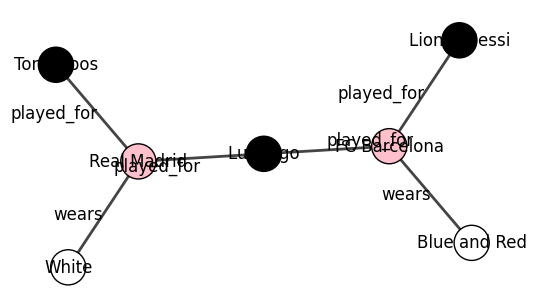

In [13]:
nodes = hetGraph.nodes
vertex_labels = [node.attributes["Name"] for node in nodes[:-2]]
vertex_labels = vertex_labels + [node.attributes["shirt_color"] for node in nodes[-2:]]
color_map = {
    "Player": "black",
    "Club": "pink",
    "Shirt": "white"
}
visual_style = {
    "vertex_label": vertex_labels,
    "edge_label": [edge.type for edge in hetGraph.edges]
}
layout = hetGraph.graph.layout_kamada_kawai()
fig, ax = plt.subplots()
hetGraph.plot(type_color_map=color_map, axis=ax, plot_args=visual_style, layout=layout)

#### Meta Paths

In order to define rich semantics of the graphs domain on the object itself, the graph constructor also considers list of meta path objects and applies it on the graph. The MetaPath object takes a list of edge types, a description and a required abbreviation. The abbreviation functions as the unique identifier of the meta path. Here, we can reuse edge types defined on the path dictionary used before.

In [14]:
edge_type_mappings = [(("Player","Club"),"played_for"), (("Club", "Shirt"),"wears")]
paths = HetPaths(edge_type_mappings)

print(paths)

hasPlayedInMetaPath = MetaPath([paths[('Player','Club')], paths[('Club','Shirt')]], "The player has played in a certain shirt color", "hasPlayedIn")

{('Player', 'Club'): 'played_for', ('Club', 'Shirt'): 'wears'}


In [15]:
# define nodes and edges
players = [Node("Player", {"Name": "Lionel Messi"}), Node("Player", {"Name": "Toni Kroos"}), Node("Player", {"Name": "Luis Figo"})]
clubs = [Node("Club", {"Name": "Real Madrid"}), Node("Club", {"Name": "FC Barcelona"})]
shirts = [Node("Shirt", {"shirt_color": "White"}), Node("Shirt", {"shirt_color": "Blue and Red"})]

nodes = list(itertools.chain(players, clubs, shirts))
edges = [
    Edge(players[0], clubs[1], False),
    Edge(players[1], clubs[0], False),
    Edge(players[2], clubs[1], False),
    Edge(players[2], clubs[0], False),
    Edge(clubs[0], shirts[0], False),
    Edge(clubs[1], shirts[1], False)
]

In [16]:
hetGraphWithMetaPaths = HetGraph(nodes, edges, pathList=paths, metaPaths=[hasPlayedInMetaPath])

Some edge types are undefined. Infering types from paths...


We can check whether the meta path was defined correctly on the graph.

In [17]:
hetGraphWithMetaPaths.getDefinedMetaPaths()

{'hasPlayedIn': ['played_for', 'wears']}

Also, we can add a meta path in hindsight.

In [18]:
reverseMetaPath = MetaPath([paths[('Club','Shirt')], paths[('Player','Club')]], "The shirt color was worn by the player", "wasWornBy")
hetGraphWithMetaPaths.addMetaPath(reverseMetaPath)

In [19]:
hetGraphWithMetaPaths.getDefinedMetaPaths()

{'hasPlayedIn': ['played_for', 'wears'], 'wasWornBy': ['wears', 'played_for']}

#### Create a graph from a .csv file

HetPy provides a utility function to create a heterogeneous graph from a .csv file. For pracitcallity reasons, we assume each row of the .csv file to be a node and create edges by specifying the row indices to which a node connects in a special column. 

In [20]:
from hetpy import fromCSV

Consider the following column structure in our demo .csv file:

In [35]:
data = pd.read_csv('./playClubData.csv')
data

,index,type,name,links_to
0,0,Player,Lionel Messi,[4]
1,1,Player,Luis Figo,"[3, 4]"
2,2,Player,Sergio Ramos,[3]
3,3,Club,Real Madrid,[5]
4,4,Club,FC Barcelona,[6]
5,5,Stadium,Bernabeu,[3]
6,6,Stadium,Camp Nou,[4]


We specify the type column and the foreign key column as function parameters and can then easily load the data into a csv file:

In [36]:
column_attribute_map = {"Name": "name"}
mockGraph = fromCSV('./playClubData.csv','type','links_to',consider_edge_directions=False, node_attribute_column_map=column_attribute_map)

mockGraph.nodeTypes

{'Club', 'Player', 'Stadium'}

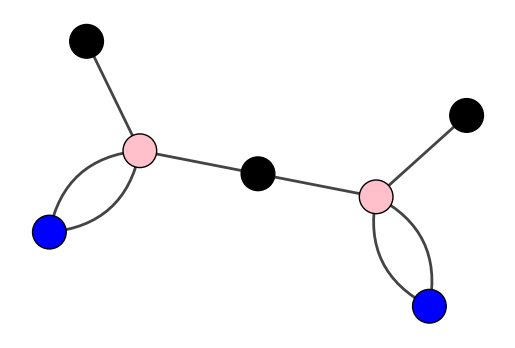

In [38]:
type_color_map = {
    "Player": "black",
    "Club": "pink",
    "Stadium": "blue"
}

layout = mockGraph.graph.layout_kamada_kawai()

fig, ax = plt.subplots()

mockGraph.plot(type_color_map=type_color_map, axis=ax, layout=layout)
